In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [396]:
df = pd.read_csv('data/adult.csv')

In [397]:
print("First 10 Rows of the the dataset: ", df.head(10))

First 10 Rows of the the dataset:     age    workclass  fnlwgt     education  education.num marital.status  \
0   90            ?   77053       HS-grad              9        Widowed   
1   82      Private  132870       HS-grad              9        Widowed   
2   66            ?  186061  Some-college             10        Widowed   
3   54      Private  140359       7th-8th              4       Divorced   
4   41      Private  264663  Some-college             10      Separated   
5   34      Private  216864       HS-grad              9       Divorced   
6   38      Private  150601          10th              6      Separated   
7   74    State-gov   88638     Doctorate             16  Never-married   
8   68  Federal-gov  422013       HS-grad              9       Divorced   
9   41      Private   70037  Some-college             10  Never-married   

          occupation    relationship   race     sex  capital.gain  \
0                  ?   Not-in-family  White  Female             0   
1

In [398]:
print("Shape of the the dataset: ",df.shape)

Shape of the the dataset:  (32561, 15)


In [399]:
print("Data Types of Columns: \n", df.dtypes)

Data Types of Columns: 
 age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


In [400]:
print("Info: \n",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Info: 
 None


In [401]:
print("Basic Statistics for numerical columns: \n",df.describe())

Basic Statistics for numerical columns: 
                 age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [402]:
print("Basic Statistics for categorical columns: \n",df.describe(include='object'))

Basic Statistics for categorical columns: 
        workclass education      marital.status      occupation relationship  \
count      32561     32561               32561           32561        32561   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       22696     10501               14976            4140        13193   

         race    sex native.country income  
count   32561  32561          32561  32561  
unique      5      2             42      2  
top     White   Male  United-States  <=50K  
freq    27816  21790          29170  24720  


### Checking for duplicates

In [403]:
# checking for duplicates
duplicates = df[df.duplicated()]
print(duplicates.shape)

(24, 15)


In [404]:
# dropping duplicates by keeping the first occurance
df.drop_duplicates(keep='first', inplace=True)
df.shape

(32537, 15)

### Observing unique values for columns

In [405]:
def unique_value_analysis(df):
    columns = df.columns
    for column in columns:
        print("Column Name: ", column)
        print(f'Number of Unique values in {column}: ', len(df[column].unique()))
        print(f'Unique values in {column}: ', df[column].unique())
        print("\n")
unique_value_analysis(df)

Column Name:  age
Number of Unique values in age:  73
Unique values in age:  [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]


Column Name:  workclass
Number of Unique values in workclass:  9
Unique values in workclass:  ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']


Column Name:  fnlwgt
Number of Unique values in fnlwgt:  21648
Unique values in fnlwgt:  [ 77053 132870 186061 ...  34066  84661 257302]


Column Name:  education
Number of Unique values in education:  16
Unique values in education:  ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']


Column Name:  education.num
Number of Unique values in education.num:  16
Un

### Observing Missing Values

In [406]:
def missing_value_analysis(df):
    columns = df.columns
    for column in columns:
        print("Column Name: ", column)
        print(f'Number of Missing values in {column}: ', df[column].isnull().sum())
        print("\n")
missing_value_analysis(df)

Column Name:  age
Number of Missing values in age:  0


Column Name:  workclass
Number of Missing values in workclass:  0


Column Name:  fnlwgt
Number of Missing values in fnlwgt:  0


Column Name:  education
Number of Missing values in education:  0


Column Name:  education.num
Number of Missing values in education.num:  0


Column Name:  marital.status
Number of Missing values in marital.status:  0


Column Name:  occupation
Number of Missing values in occupation:  0


Column Name:  relationship
Number of Missing values in relationship:  0


Column Name:  race
Number of Missing values in race:  0


Column Name:  sex
Number of Missing values in sex:  0


Column Name:  capital.gain
Number of Missing values in capital.gain:  0


Column Name:  capital.loss
Number of Missing values in capital.loss:  0


Column Name:  hours.per.week
Number of Missing values in hours.per.week:  0


Column Name:  native.country
Number of Missing values in native.country:  0


Column Name:  income
Number of

### Although there are no missing values in any column, we can see in unique value list some values are '?'. They are essentially euvalent to Nan Values

In [407]:
df[df == '?'].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [408]:
#Replacing '?' with NaN values
df[df == '?'] = np.nan

In [409]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [410]:
missing_value_analysis(df)

Column Name:  age
Number of Missing values in age:  0


Column Name:  workclass
Number of Missing values in workclass:  1836


Column Name:  fnlwgt
Number of Missing values in fnlwgt:  0


Column Name:  education
Number of Missing values in education:  0


Column Name:  education.num
Number of Missing values in education.num:  0


Column Name:  marital.status
Number of Missing values in marital.status:  0


Column Name:  occupation
Number of Missing values in occupation:  1843


Column Name:  relationship
Number of Missing values in relationship:  0


Column Name:  race
Number of Missing values in race:  0


Column Name:  sex
Number of Missing values in sex:  0


Column Name:  capital.gain
Number of Missing values in capital.gain:  0


Column Name:  capital.loss
Number of Missing values in capital.loss:  0


Column Name:  hours.per.week
Number of Missing values in hours.per.week:  0


Column Name:  native.country
Number of Missing values in native.country:  582


Column Name:  income
N

### Handling missing Values

Column: workclass

In [411]:
df['workclass'].unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

C:\Users\athar\AppData\Local\Temp\ipykernel_19048\2466545049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='workclass', data=df, palette='Set2')


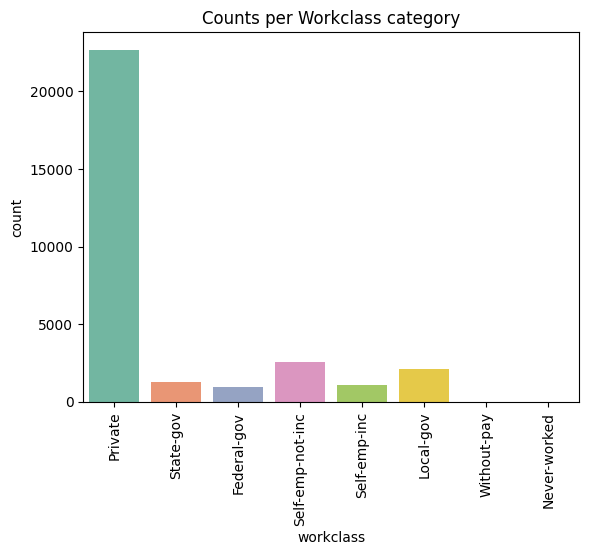

In [412]:
#Replacing the NaN values with the most freuently appearing value
sns.countplot(x='workclass', data=df, palette='Set2')
plt.title('Counts per Workclass category')
plt.xticks(rotation=90)
plt.show()


workclass_mode = df.describe(include='all')['workclass']['top']

df['workclass'] = df['workclass'].fillna(workclass_mode)

Column: occupation

In [413]:
df['occupation'].unique()

array([nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

C:\Users\athar\AppData\Local\Temp\ipykernel_19048\3046697837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='occupation', data=df, palette='Set1')


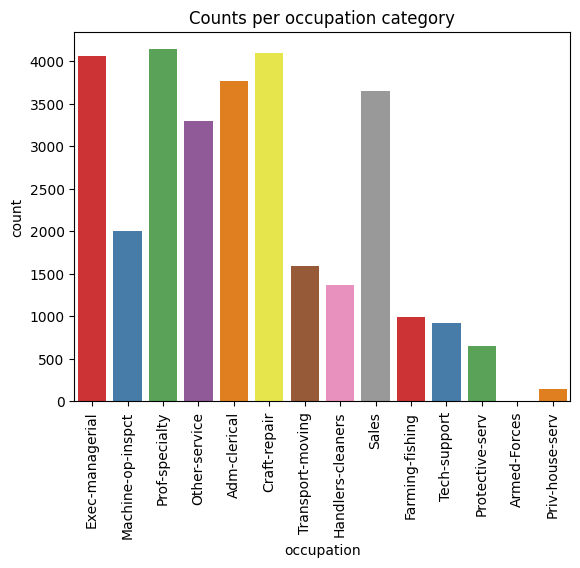

In [414]:
#Replacing the NaN values with the most freuently appearing value
sns.countplot(x='occupation', data=df, palette='Set1')
plt.title('Counts per occupation category')
plt.xticks(rotation=90)
plt.show()


occupation_mode = df.describe(include='all')['occupation']['top']

df['occupation'] = df['occupation'].fillna(occupation_mode)

Column: native.country

In [415]:
df['native.country'].unique()

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

C:\Users\athar\AppData\Local\Temp\ipykernel_19048\1061290234.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='native.country', y='Count', data=df_top_10, palette='Set3')


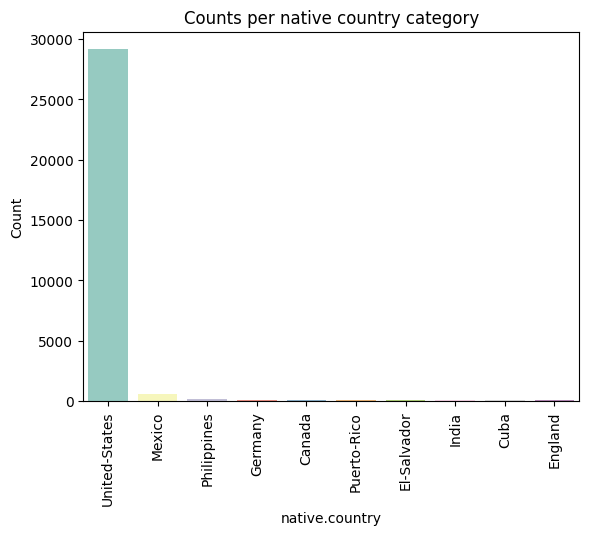

United-States                 29153
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [416]:
#Replacing the NaN values with the most freuently appearing value
top_10_counts = df['native.country'].value_counts().head(10)

# Create a new DataFrame with only the top 10 categories and their counts
df_top_10 = top_10_counts.reset_index()
df_top_10.columns = ['native.country', 'Count']

# Create a Seaborn bar plot with categories sorted in descending order
sns.barplot(x='native.country', y='Count', data=df_top_10, palette='Set3')

# sns.countplot(x='native.country', data=df, palette='Set1')
plt.title('Counts per native country category')
plt.xticks(rotation=90)
plt.show()

print(df['native.country'].value_counts())


native_country_mode = df.describe(include='all')['native.country']['top']

df['native.country'] = df['native.country'].fillna(native_country_mode)

### All missing values are handled

In [417]:
missing_value_analysis(df)

Column Name:  age
Number of Missing values in age:  0


Column Name:  workclass
Number of Missing values in workclass:  0


Column Name:  fnlwgt
Number of Missing values in fnlwgt:  0


Column Name:  education
Number of Missing values in education:  0


Column Name:  education.num
Number of Missing values in education.num:  0


Column Name:  marital.status
Number of Missing values in marital.status:  0


Column Name:  occupation
Number of Missing values in occupation:  0


Column Name:  relationship
Number of Missing values in relationship:  0


Column Name:  race
Number of Missing values in race:  0


Column Name:  sex
Number of Missing values in sex:  0


Column Name:  capital.gain
Number of Missing values in capital.gain:  0


Column Name:  capital.loss
Number of Missing values in capital.loss:  0


Column Name:  hours.per.week
Number of Missing values in hours.per.week:  0


Column Name:  native.country
Number of Missing values in native.country:  0


Column Name:  income
Number of

In [418]:
def analyze_categorical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
    plt.show()

def analyze_stats_categorical(df, col):
    print(f"{col} Summary:")
    print(df[col].value_counts())
    print("Unique values:", df[col].nunique())
    print("\n")

def analyze_piechart_categorical(df, col):
    df[col].value_counts().plot.pie(autopct= '%1.1f%%')
    print("\n")

## Selecting income column as our Target

C:\Users\athar\AppData\Local\Temp\ipykernel_19048\3900697248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


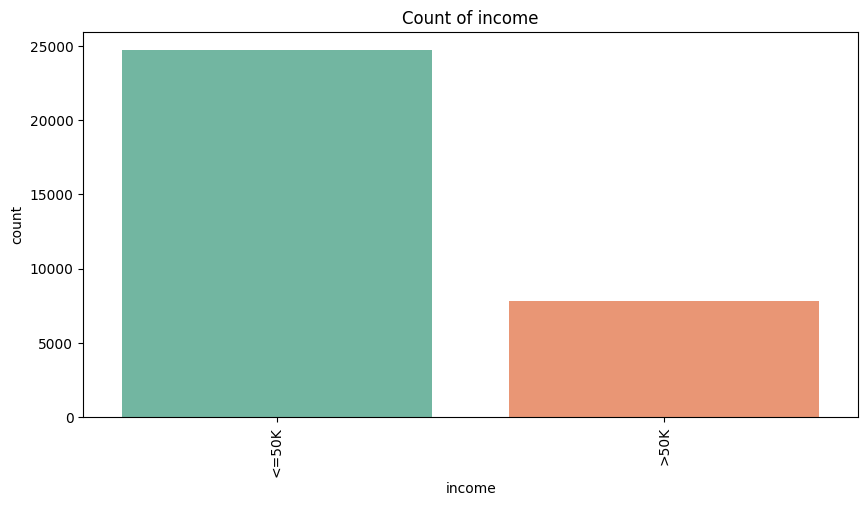

income Summary:
<=50K    24698
>50K      7839
Name: income, dtype: int64
Unique values: 2






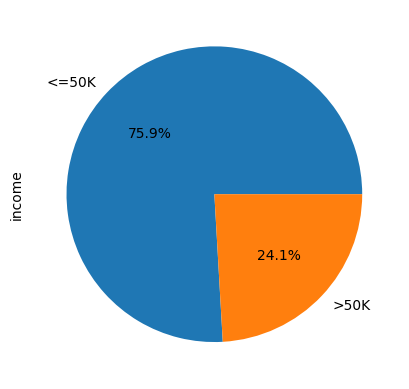

In [419]:
analyze_categorical_distribution(df,'income')
analyze_stats_categorical(df,'income')
analyze_piechart_categorical(df,'income')

It can be seen people earning less than equal to 50K is huge as compared to people earning more than 50K

In [420]:
#Ordinal Encoding income values to numerical (binary)
df['income_encoded'] = df['income'].map({'<=50K': 0, '>50K': 1})
print(df[['income', 'income_encoded']])

      income  income_encoded
0      <=50K               0
1      <=50K               0
2      <=50K               0
3      <=50K               0
4      <=50K               0
...      ...             ...
32556  <=50K               0
32557  <=50K               0
32558   >50K               1
32559  <=50K               0
32560  <=50K               0

[32537 rows x 2 columns]


In [421]:
# Get all categorical column names
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Get all numerical column names
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
Numerical Columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income_encoded']


## Categorical Columns

1. Workclass

C:\Users\athar\AppData\Local\Temp\ipykernel_19048\3900697248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


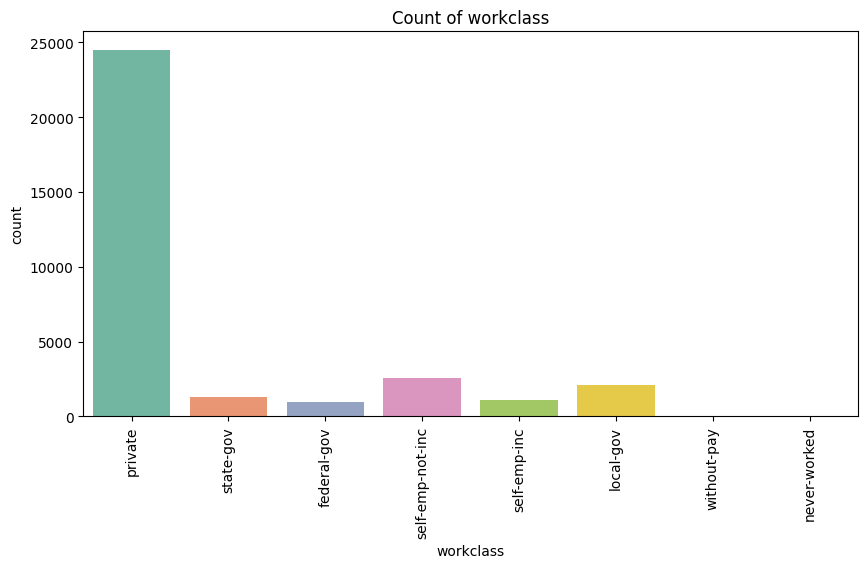

workclass Summary:
private             24509
self-emp-not-inc     2540
local-gov            2093
state-gov            1298
self-emp-inc         1116
federal-gov           960
without-pay            14
never-worked            7
Name: workclass, dtype: int64
Unique values: 8




In [422]:
#Make casing consistent (lower-case)
df['workclass'] = df['workclass'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'workclass')
analyze_stats_categorical(df,'workclass')

- Private workclass dominates the count with around 24000.

<Figure size 800x500 with 0 Axes>

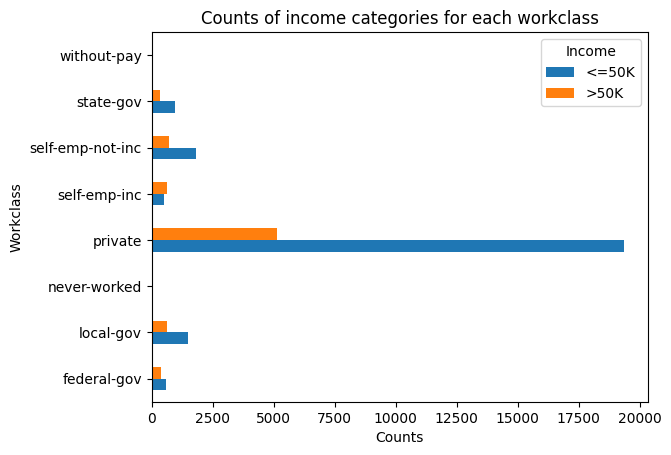

In [423]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['workclass', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each workclass')
plt.ylabel('Workclass')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

- within private workclass, the people with <=50K income dominate people with >50K income

2. education

C:\Users\athar\AppData\Local\Temp\ipykernel_19048\3900697248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


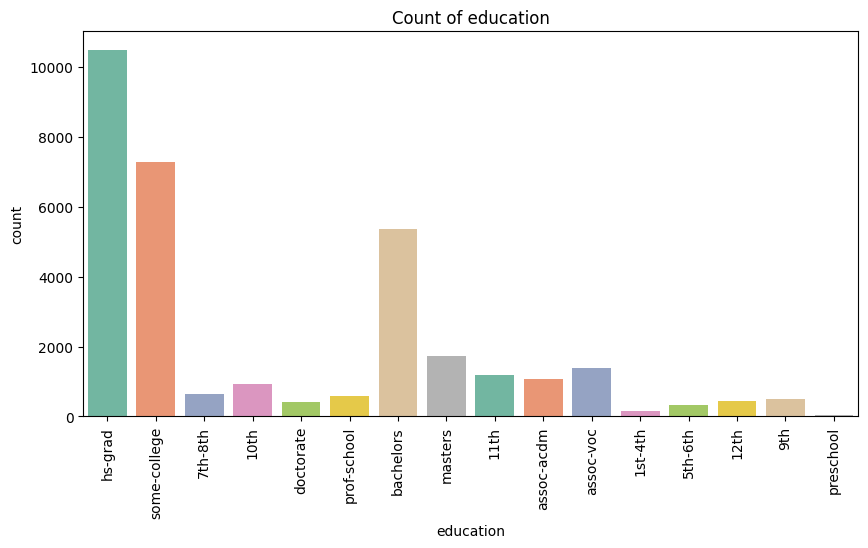

education Summary:
hs-grad         10494
some-college     7282
bachelors        5353
masters          1722
assoc-voc        1382
11th             1175
assoc-acdm       1067
10th              933
7th-8th           645
prof-school       576
9th               514
12th              433
doctorate         413
5th-6th           332
1st-4th           166
preschool          50
Name: education, dtype: int64
Unique values: 16




In [424]:
#Make casing consistent (lower-case)
df['education'] = df['education'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'education')
analyze_stats_categorical(df,'education')

- hs-grad has highest no of adults.
- preschool have lowest.

In [457]:
conditions = [
    df['education'].isin(['1st-4th', '5th-6th']),
    df['education'].isin(['7th-8th', '9th', '10th', '11th', '12th']),
    df['education'] == 'hs-grad',
    df['education'].isin(['some-college', 'assoc-voc', 'assoc-acdm']),
    df['education'] == 'bachelors',
    df['education'].isin(['prof-school', 'doctorate'])
]

labels = [
    'primary',
    'middle-School',
    'hs-grad',
    'Others',
    'bachelors',
    'phd'
]

df['education_group'] = np.select(conditions, labels, default='Other')
print(df[['education', 'education_group']].head(50))

       education education_group
0        hs-grad         hs-grad
1        hs-grad         hs-grad
2   some-college          Others
3        7th-8th   middle-School
4   some-college          Others
5        hs-grad         hs-grad
6           10th   middle-School
7      doctorate             phd
8        hs-grad         hs-grad
9   some-college          Others
10     doctorate             phd
11   prof-school             phd
12     bachelors       bachelors
13       masters           Other
14     doctorate             phd
15   prof-school             phd
16          11th   middle-School
17       masters           Other
18    assoc-acdm          Others
19     bachelors       bachelors
20     bachelors       bachelors
21          11th   middle-School
22       hs-grad         hs-grad
23  some-college          Others
24       hs-grad         hs-grad
25     assoc-voc          Others
26       1st-4th         primary
27       5th-6th         primary
28          10th   middle-School
29        

<Figure size 800x500 with 0 Axes>

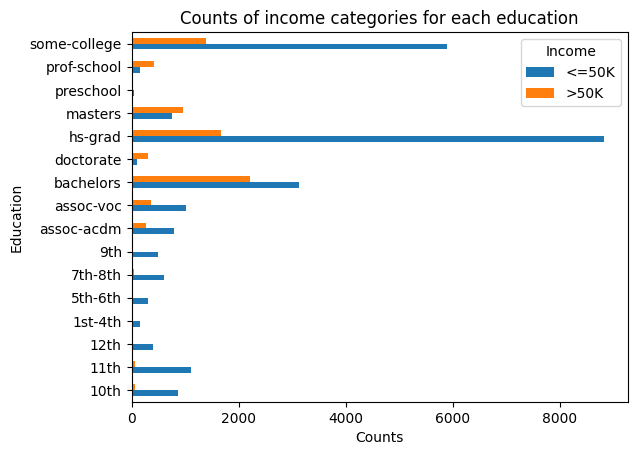

In [426]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['education', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each education')
plt.ylabel('Education')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

3. marital.status

C:\Users\athar\AppData\Local\Temp\ipykernel_19048\3900697248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


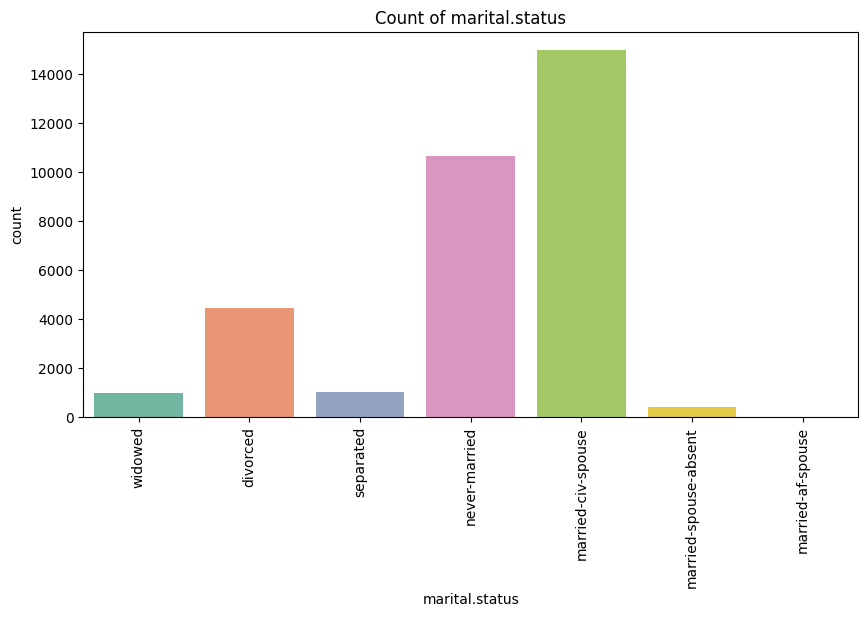

marital.status Summary:
married-civ-spouse       14970
never-married            10667
divorced                  4441
separated                 1025
widowed                    993
married-spouse-absent      418
married-af-spouse           23
Name: marital.status, dtype: int64
Unique values: 7




In [427]:
#Make casing consistent (lower-case)
df['marital.status'] = df['marital.status'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'marital.status')
analyze_stats_categorical(df,'marital.status')

- married-civ-spouse has maximum count.
- married-af-spouse has minimum count.

<Figure size 800x500 with 0 Axes>

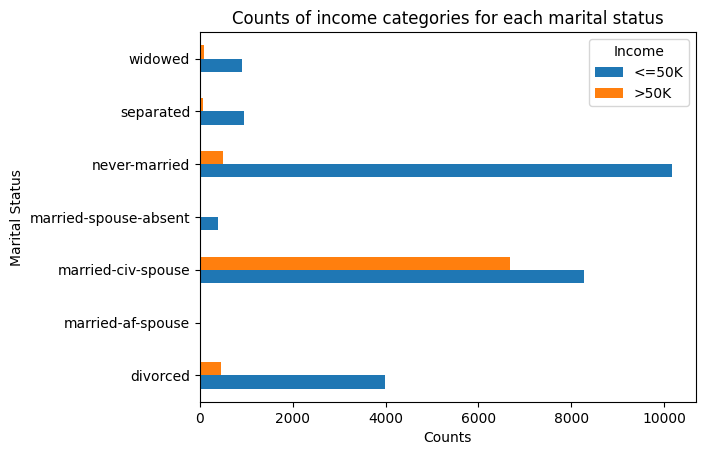

In [428]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['marital.status', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each marital status')
plt.ylabel('Marital Status')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

4. occupation

C:\Users\athar\AppData\Local\Temp\ipykernel_19048\3900697248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


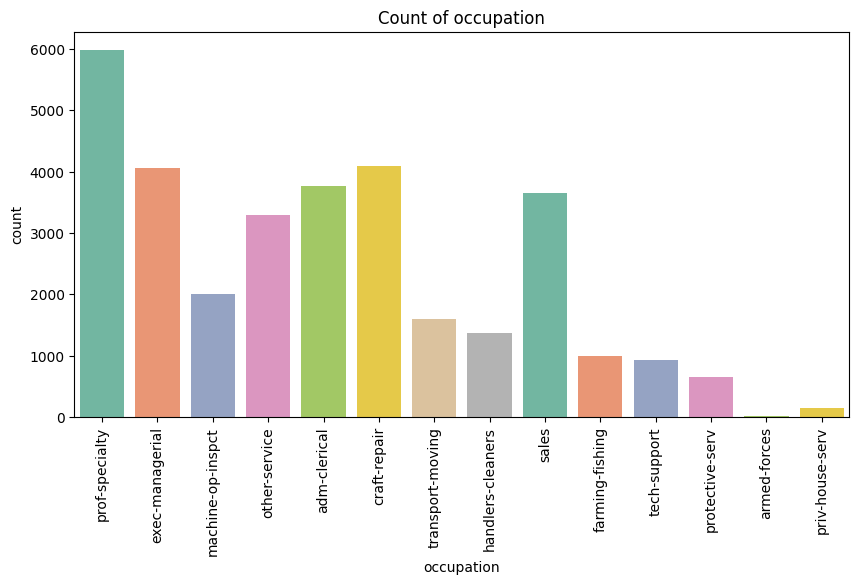

occupation Summary:
prof-specialty       5979
craft-repair         4094
exec-managerial      4065
adm-clerical         3768
sales                3650
other-service        3291
machine-op-inspct    2000
transport-moving     1597
handlers-cleaners    1369
farming-fishing       992
tech-support          927
protective-serv       649
priv-house-serv       147
armed-forces            9
Name: occupation, dtype: int64
Unique values: 14




In [429]:
#Make casing consistent (lower-case)
df['occupation'] = df['occupation'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'occupation')
analyze_stats_categorical(df,'occupation')

- craft-repair has the maximum count.
- armed-forces has minimum scount.

<Figure size 800x500 with 0 Axes>

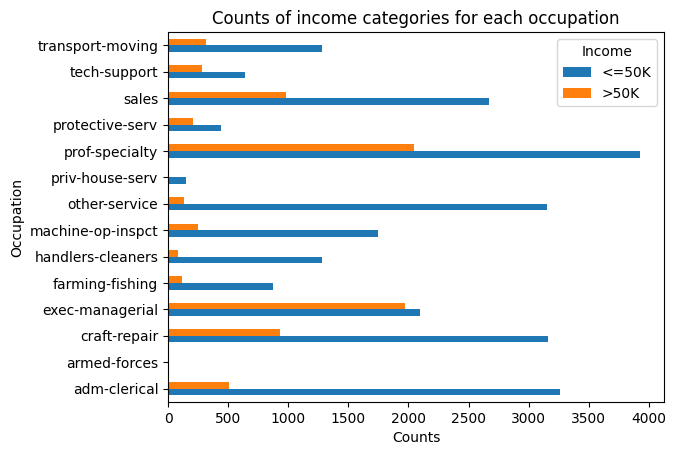

In [430]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['occupation', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each occupation')
plt.ylabel('Occupation')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

5. relationship

C:\Users\athar\AppData\Local\Temp\ipykernel_19048\3900697248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


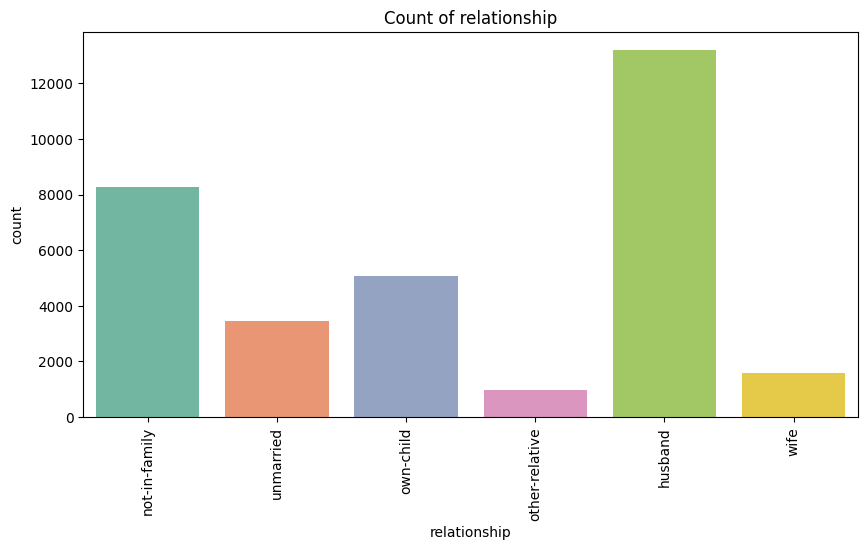

relationship Summary:
husband           13187
not-in-family      8292
own-child          5064
unmarried          3445
wife               1568
other-relative      981
Name: relationship, dtype: int64
Unique values: 6




In [431]:
#Make casing consistent (lower-case)
df['relationship'] = df['relationship'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'relationship')
analyze_stats_categorical(df,'relationship')

- Husband has the maximum count. Indicating majority of Males.
- Wife has the lowest count

<Figure size 800x500 with 0 Axes>

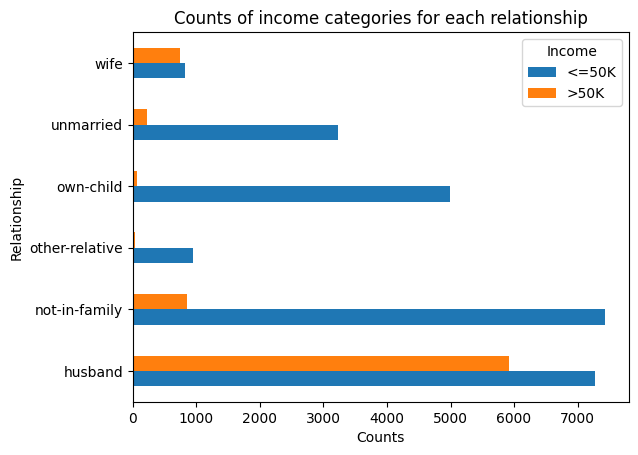

In [432]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['relationship', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each relationship')
plt.ylabel('Relationship')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

- A person with relation as husband in a family has greater probability of having >50K income

6. race

C:\Users\athar\AppData\Local\Temp\ipykernel_19048\3900697248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


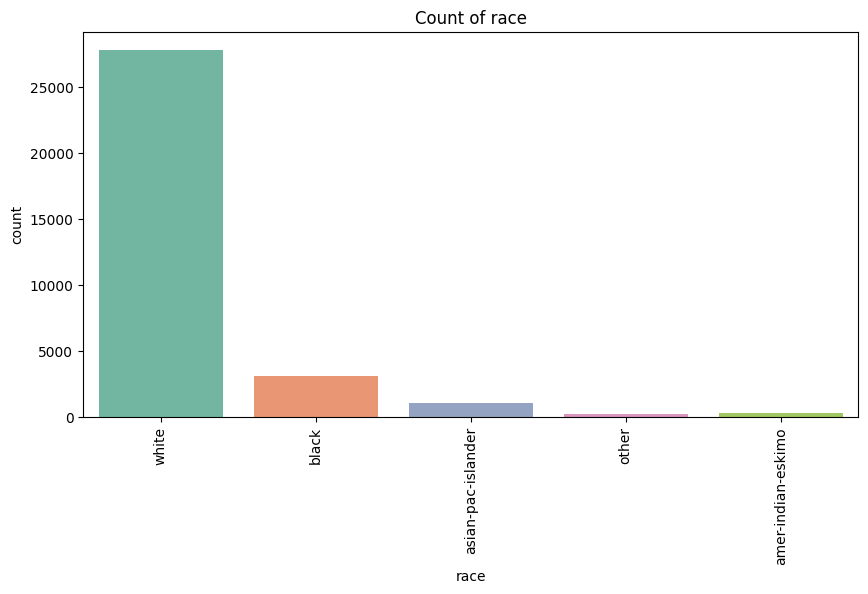

race Summary:
white                 27795
black                  3122
asian-pac-islander     1038
amer-indian-eskimo      311
other                   271
Name: race, dtype: int64
Unique values: 5




In [433]:
#Make casing consistent (lower-case)
df['race'] = df['race'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'race')
analyze_stats_categorical(df,'race')

<Figure size 800x500 with 0 Axes>

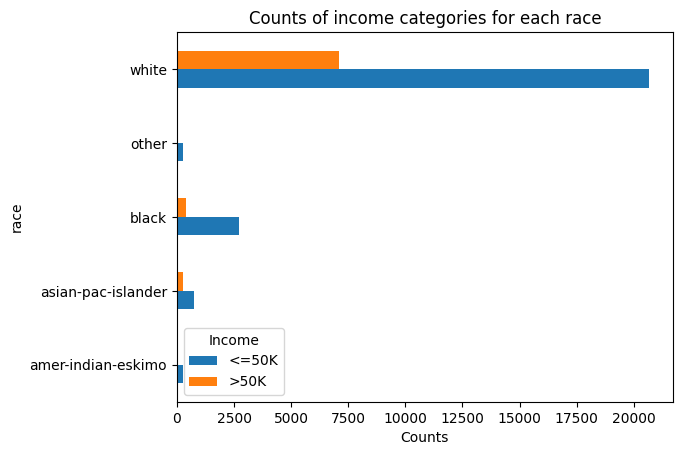

In [434]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['race', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each race')
plt.ylabel('race')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

7. sex

C:\Users\athar\AppData\Local\Temp\ipykernel_19048\3900697248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


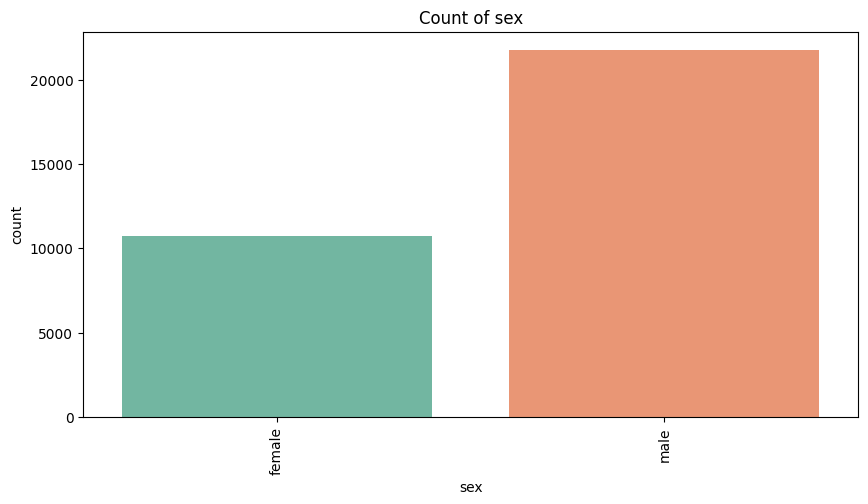

sex Summary:
male      21775
female    10762
Name: sex, dtype: int64
Unique values: 2




In [435]:
#Make casing consistent (lower-case)
df['sex'] = df['sex'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'sex')
analyze_stats_categorical(df,'sex')

- Count of Males is almost double that of Females

<Figure size 800x500 with 0 Axes>

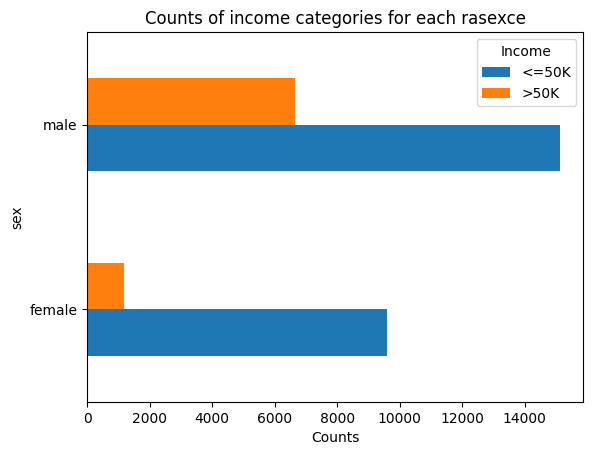

In [436]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['sex', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each rasexce')
plt.ylabel('sex')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

- It can be seen that count of males is much more than females in both categories of income.

8. native.country

C:\Users\athar\AppData\Local\Temp\ipykernel_19048\3900697248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


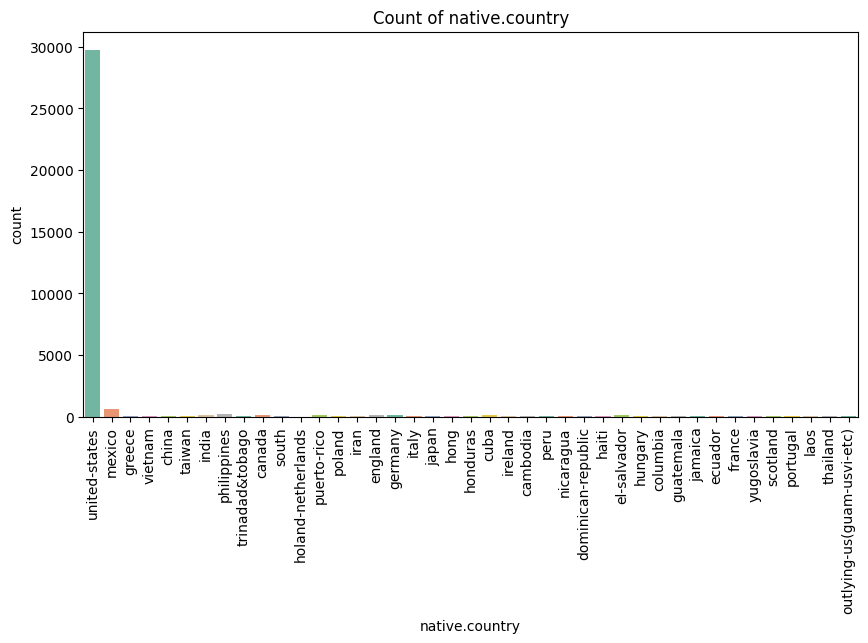

native.country Summary:
united-states                 29735
mexico                          639
philippines                     198
germany                         137
canada                          121
puerto-rico                     114
el-salvador                     106
india                           100
cuba                             95
england                          90
jamaica                          81
south                            80
china                            75
italy                            73
dominican-republic               70
vietnam                          67
guatemala                        62
japan                            62
poland                           60
columbia                         59
taiwan                           51
haiti                            44
iran                             43
portugal                         37
nicaragua                        34
peru                             31
greece                           29
fran

In [437]:
#Make casing consistent (lower-case)
df['native.country'] = df['native.country'].apply(lambda x: x.lower() if pd.notna(x) else x)

analyze_categorical_distribution(df,'native.country')
analyze_stats_categorical(df,'native.country')

<Figure size 800x500 with 0 Axes>

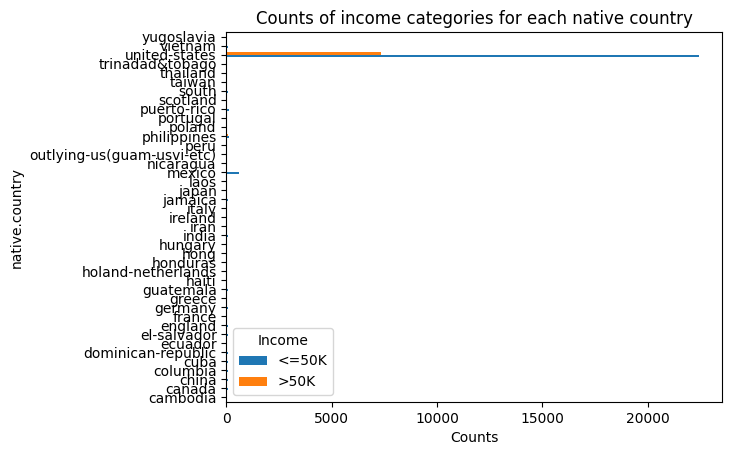

In [438]:
plt.figure(figsize=(8, 5))
counts = df.groupby(['native.country', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each native country')
plt.ylabel('native.country')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

In [439]:
def visualize_numerical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

def box_plot_for_column(df, col):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

def box_plot_col_target(df, col, target):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=target, y=col)
    plt.title(f'Box Plot of {col} by {target}')
    plt.xlabel(f'{target}')
    plt.ylabel(f'{col}')
    plt.show()

def min_max_mean_numerical(df, col):
    print(f"Minimum value in {col}: ", df[col].min())
    print(f"Maximum value in {col}: ", df[col].max())
    print(f"Mean value of {col}: ", df[col].mean())

## Numerical Columns

1. age

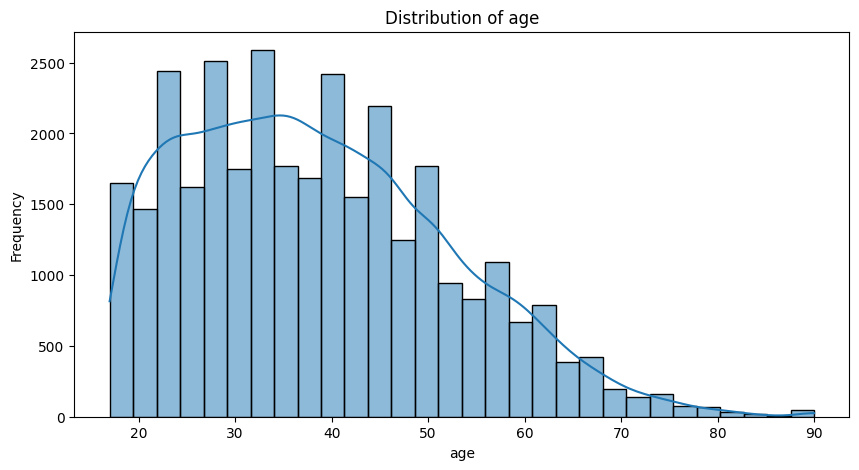

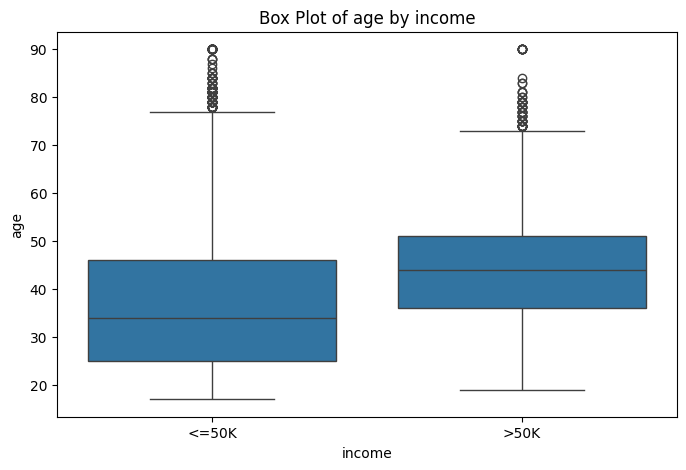

Minimum value in age:  17
Maximum value in age:  90
Mean value of age:  38.585548759873376


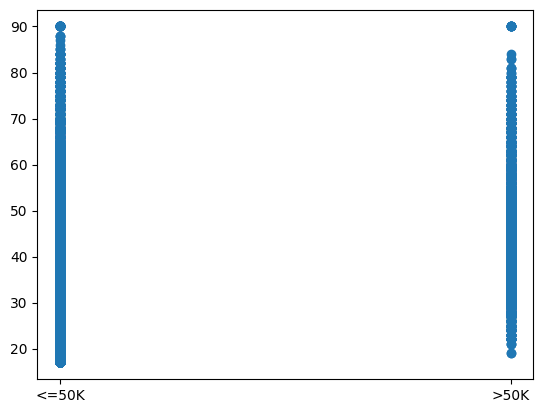

In [440]:
visualize_numerical_distribution(df, 'age')
box_plot_col_target(df, 'age', 'income')
plt.scatter(df['income'], df['age'])

min_max_mean_numerical(df, 'age')

- we can see that the median age for people earning >=50K is much greater than the median of people earning <50K.
- Thus people with higher age are more likely to earn >=50K a year as compared to people with lower age.

- It can be seen that age feature is right-skewed.
- Min Age is 17
- Max Age is 90
- Thus Range is from [17,90]

2. fnlwgt

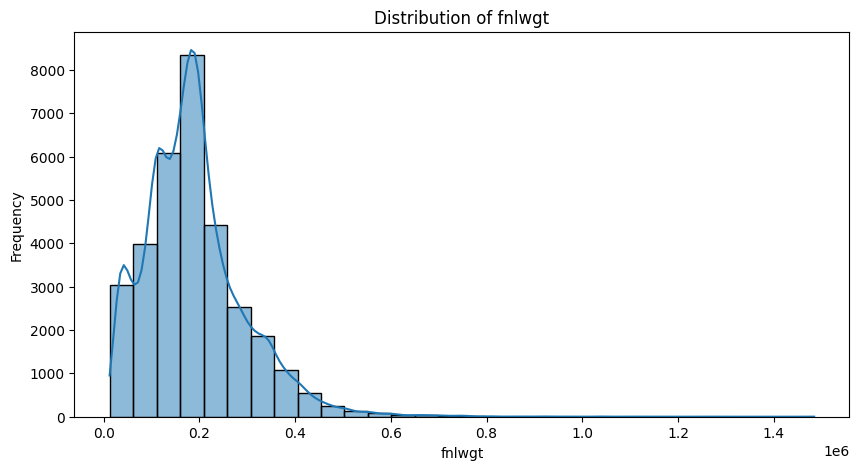

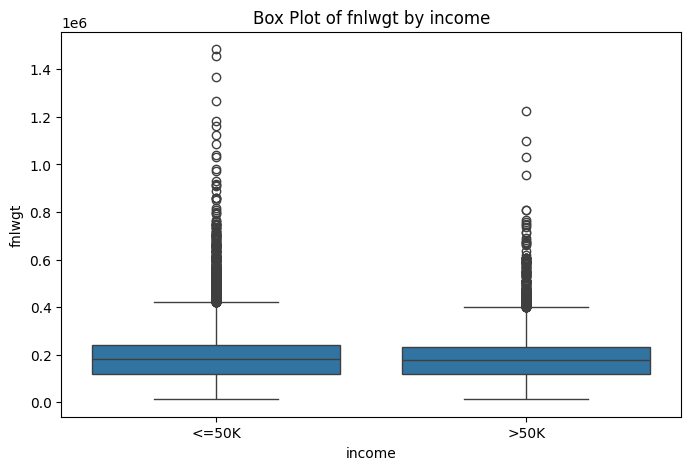

Minimum value in fnlwgt:  12285
Maximum value in fnlwgt:  1484705
Mean value of fnlwgt:  189780.84851092604


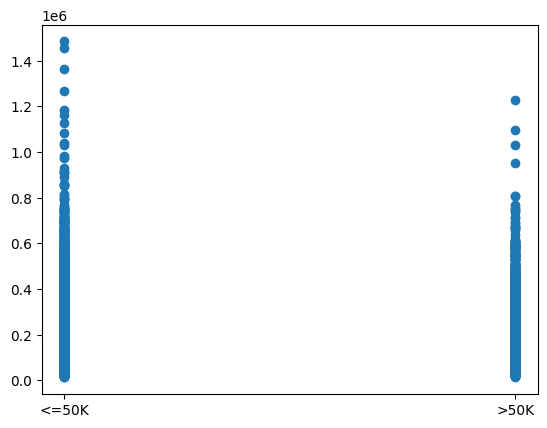

In [441]:
visualize_numerical_distribution(df, 'fnlwgt')
box_plot_col_target(df, 'fnlwgt', 'income')
plt.scatter(df['income'], df['fnlwgt'])

min_max_mean_numerical(df, 'fnlwgt')

- It can be seen that age feature is right-skewed.
- Min Age is 12285
- Max Age is 1484705
- Thus Range is from [12285,1484705]

3. education.num

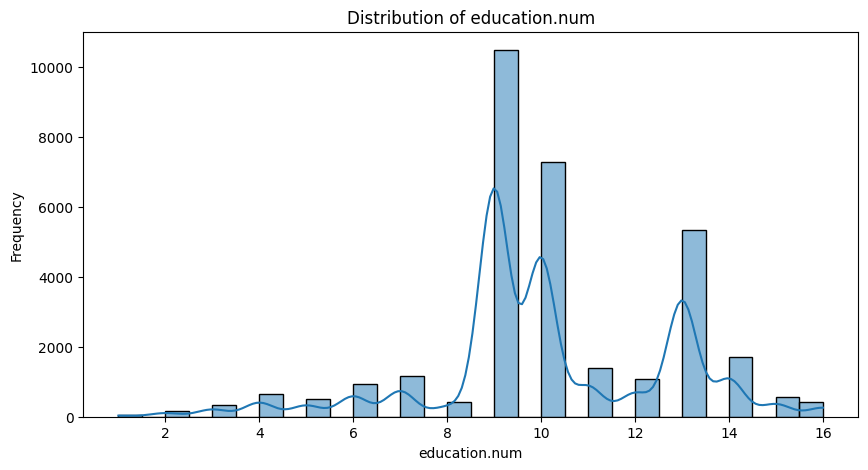

<Figure size 800x500 with 0 Axes>

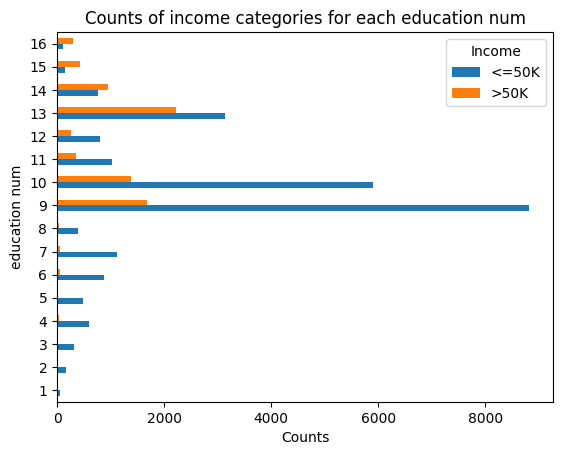

In [442]:
visualize_numerical_distribution(df, 'education.num')

plt.figure(figsize=(8, 5))
counts = df.groupby(['education.num', 'income']).size().unstack()
counts.plot(kind='barh')
plt.title('Counts of income categories for each education num')
plt.ylabel('education num')
plt.xlabel('Counts')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()

4. capital.gain

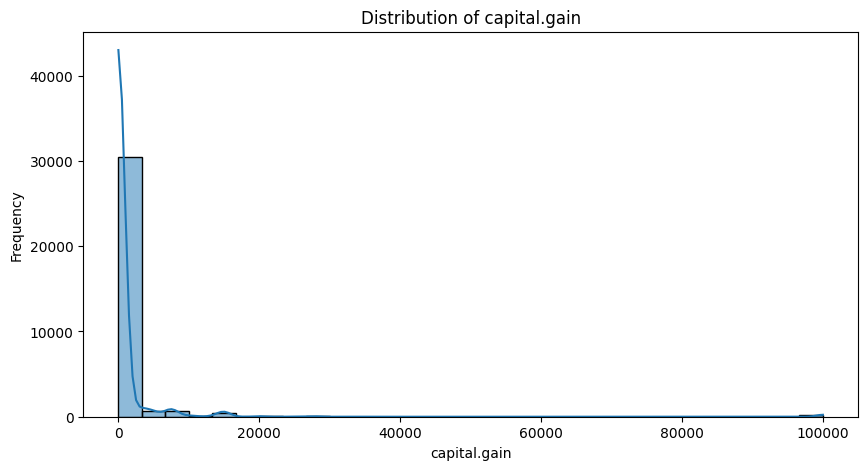

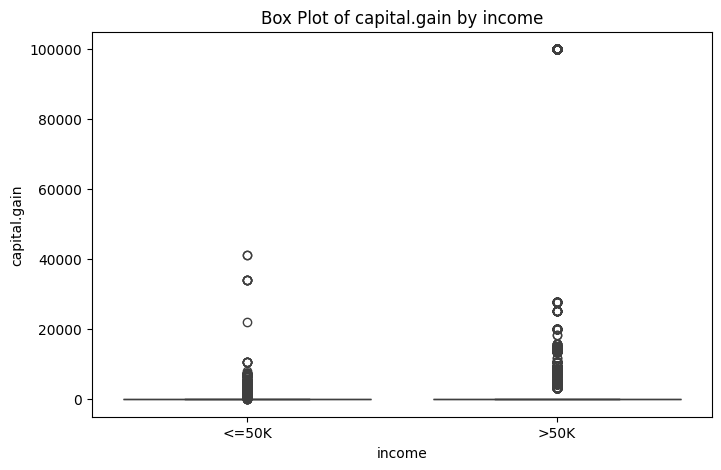

income
<=50K     148.884970
>50K     4007.164562
Name: capital.gain, dtype: float64


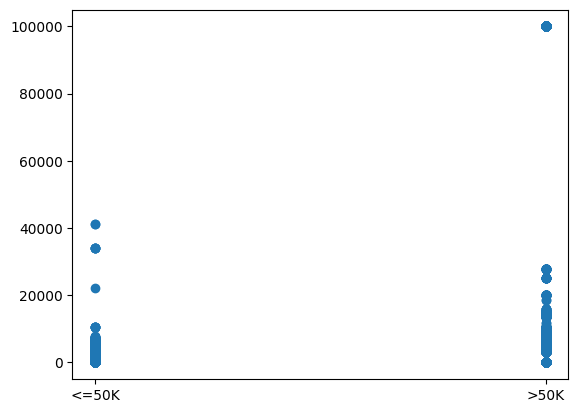

In [443]:
visualize_numerical_distribution(df, 'capital.gain')
box_plot_col_target(df, 'capital.gain', 'income')
plt.scatter(df['income'], df['capital.gain'])

capital_gain_mean = df.groupby('income')['capital.gain'].mean()
print(capital_gain_mean)

Text(0, 0.5, 'count')

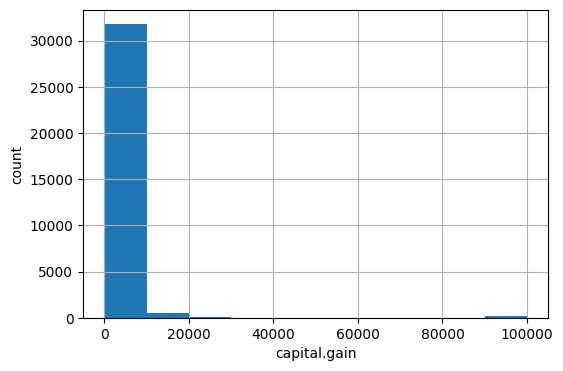

In [444]:
df['capital.gain'].hist(figsize=(6,4))
plt.xlabel('capital.gain')
plt.ylabel('count')

- Capital gain distribution is highly right skewed.
- We can see that the mean for capital gain of people with >50K income is more than mean of people with <=50K. It makes sense as prople with more money can have a greater compounding effect as a result of investing more
- The magnitude of this column is higer and thus needs to be normalized to avoid bias
- The column can even be ignored as most of the values are 0
- Some outliers are present

5. capital.loss

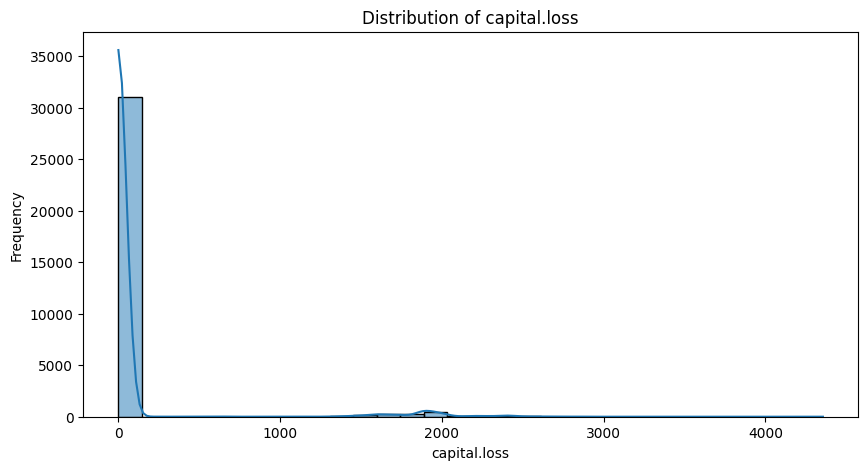

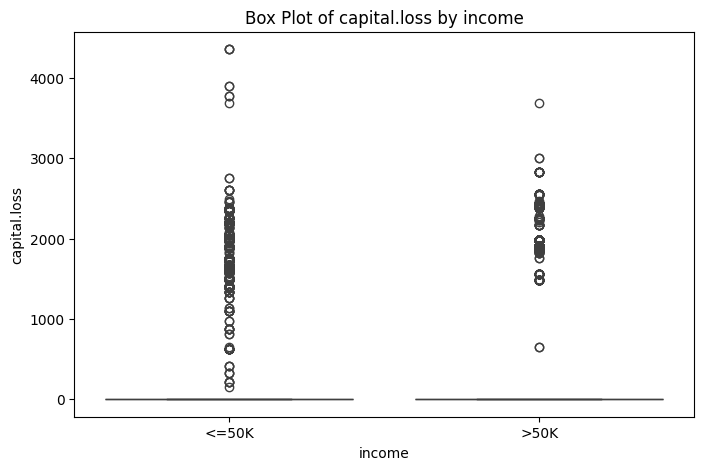

income
<=50K     53.190258
>50K     195.051282
Name: capital.loss, dtype: float64


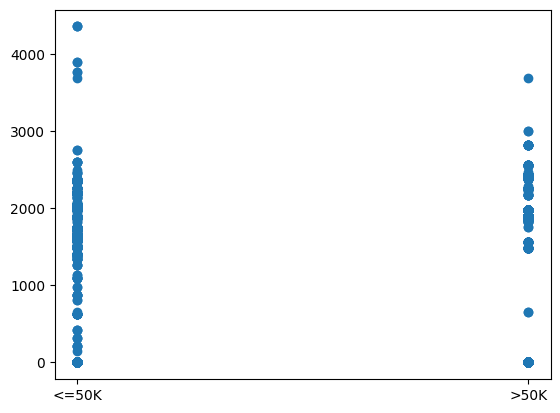

In [445]:
visualize_numerical_distribution(df, 'capital.loss')
box_plot_col_target(df, 'capital.loss', 'income')
plt.scatter(df['income'], df['capital.loss'])

capital_loss_mean = df.groupby('income')['capital.loss'].mean()
print(capital_loss_mean)

Text(0, 0.5, 'count')

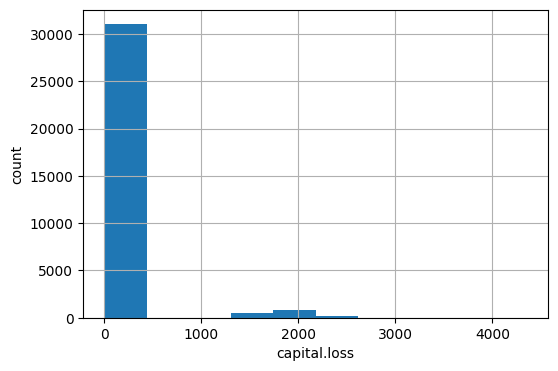

In [446]:
df['capital.loss'].hist(figsize=(6,4))
plt.xlabel('capital.loss')
plt.ylabel('count')

- Capital loss distribution is highly right skewed.
- We can see that the mean for capital loss of people with >50K income similar to the mean of people with <=50K.
- The magnitude of this column is higer and thus needs to be normalized to avoid bias
- The column can even be ignored as most of the values are 0
- Some outliers are present

6. hours.per.week

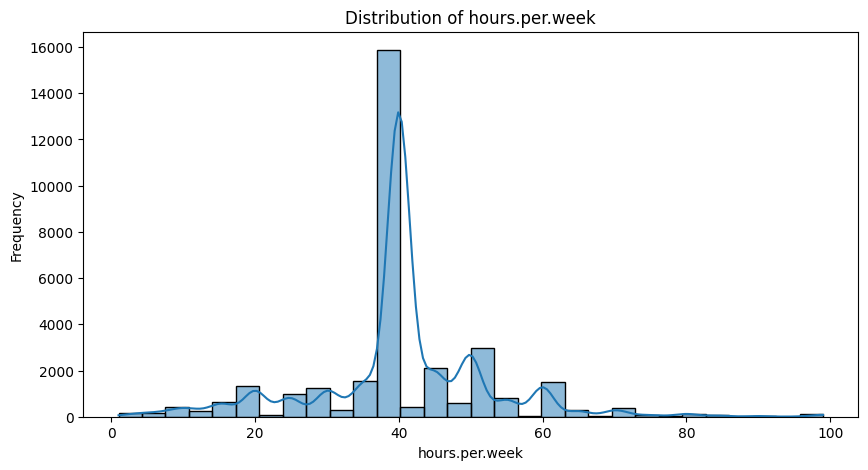

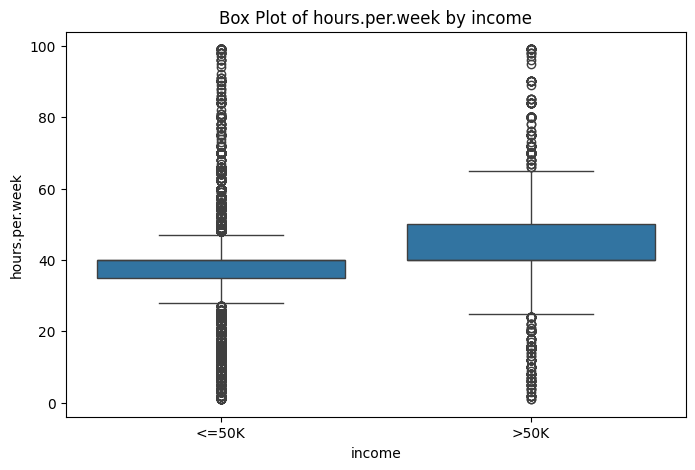

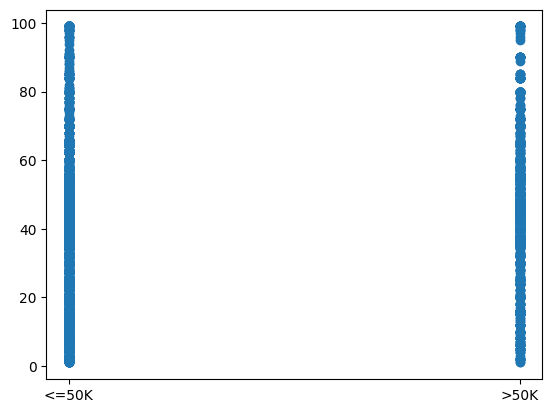

In [447]:
visualize_numerical_distribution(df, 'hours.per.week')
box_plot_col_target(df, 'hours.per.week', 'income')
plt.scatter(df['income'], df['hours.per.week'])

- The hours per week distribution seems normally distributed.
- Max count occurs for 30-40 hours
- Fewer number of people work for 80-100 hours. Might be outliers

## Visualization for categorical

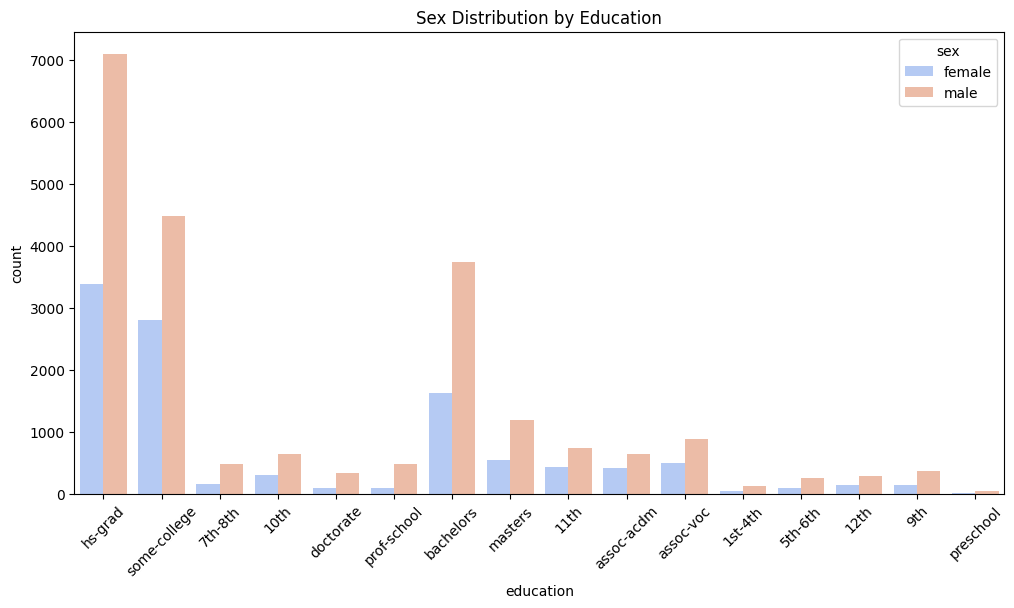

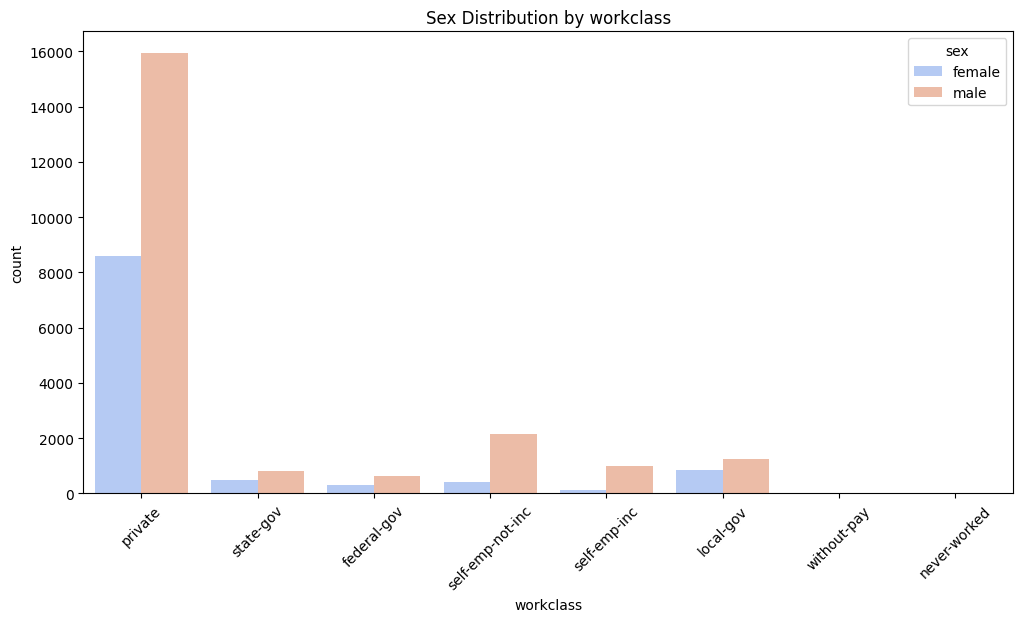

In [448]:
# Grouped bar plot: Education vs Sex
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='sex', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Sex Distribution by Education')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='workclass', hue='sex', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Sex Distribution by workclass')
plt.show()

1. Sex Distribution by Education - Count of males for eevry education category is greater than females

1. Sex Distribution by workclass - Count of males for eevry workclass category is greater than females

## Visualization for numerical

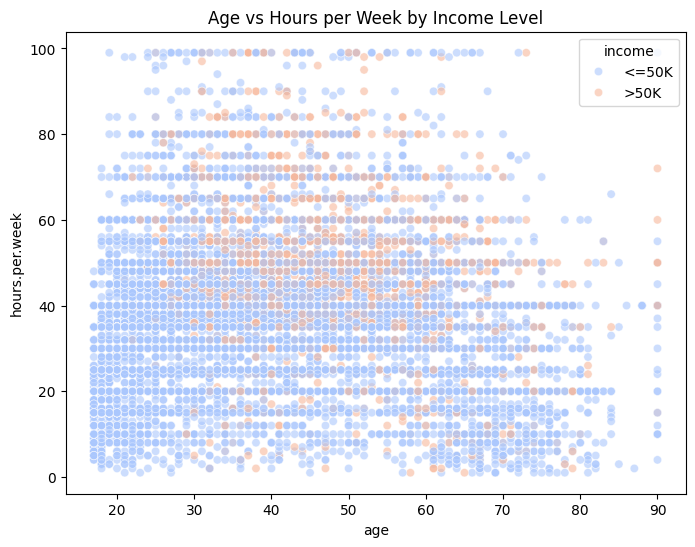

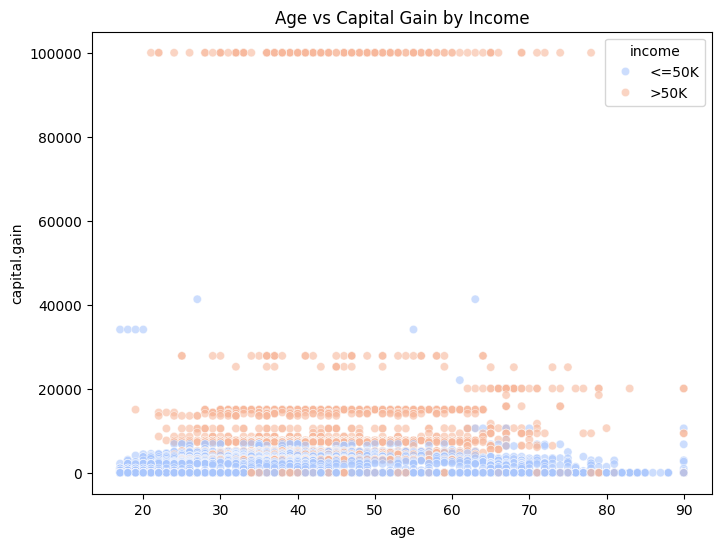

In [449]:
#Scatter plot of Age vs Hours per Week
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='hours.per.week', hue='income', palette='coolwarm', alpha=0.6)
plt.title('Age vs Hours per Week by Income Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='capital.gain', hue='income', palette='coolwarm', alpha=0.6)
plt.title('Age vs Capital Gain by Income')
plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_19048\2509858970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='workclass', y='age', palette='Set2')


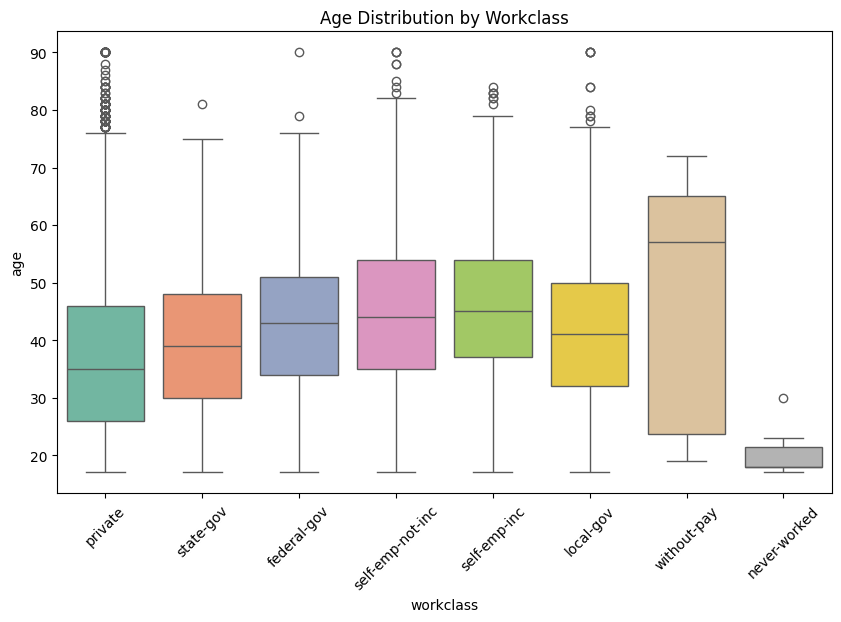

In [450]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='workclass', y='age', palette='Set2')
plt.xticks(rotation=45)
plt.title('Age Distribution by Workclass')
plt.show()

- Without pay work class has the highest mdeian age. It indicates retired people precense in the census.
- Median age of private is the lowest

C:\Users\athar\AppData\Local\Temp\ipykernel_19048\3929618704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='occupation', y='age', palette='Set3', inner='quartile')


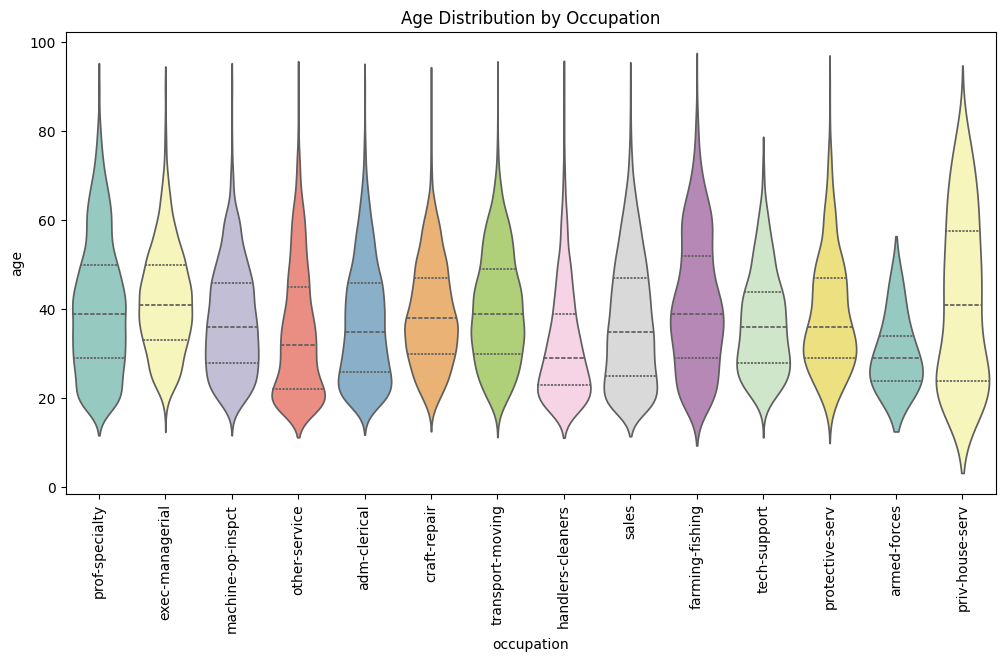

In [451]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='occupation', y='age', palette='Set3', inner='quartile')
plt.xticks(rotation=90)
plt.title('Age Distribution by Occupation')
plt.show()

- Occupations prof-speciality, excel-managerial,machine-op-inspect, transport-moving, farming-fishing is normally distributed across the ages.
- handlers-cleaners, other-service are more preferred by younger people.

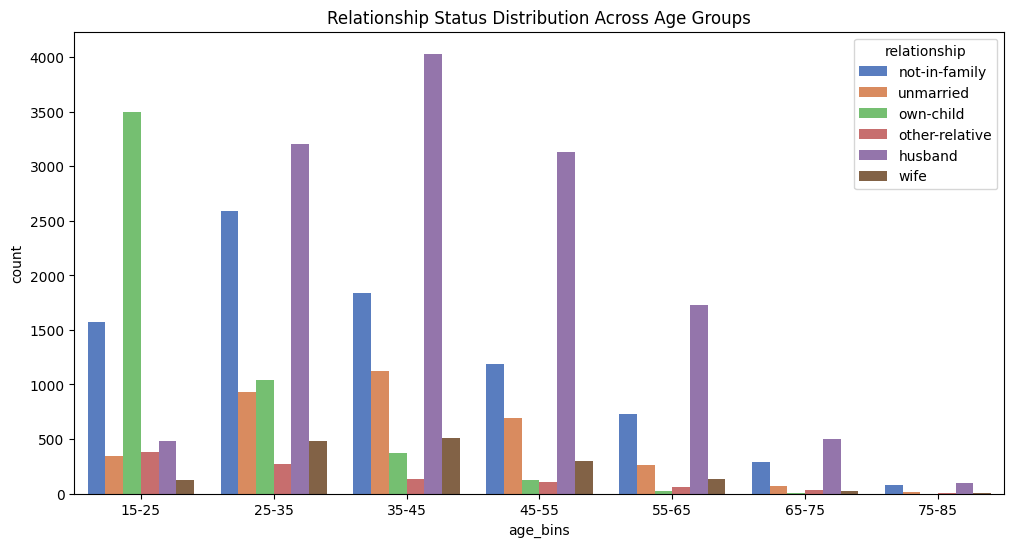

In [452]:
df['age_bins'] = pd.cut(df['age'], bins=[15, 25, 35, 45, 55, 65, 75, 85], labels=['15-25', '25-35', '35-45', '45-55', '55-65', '65-75','75-85'])
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age_bins', hue='relationship', palette='muted')
plt.title('Relationship Status Distribution Across Age Groups')
plt.show()

- It is seen that husband relationship dominates 25-35, 35-40 ,45-55 age groups.
- 15-25 is dominated by own-child

Correlation Matrices

1. Numerical features

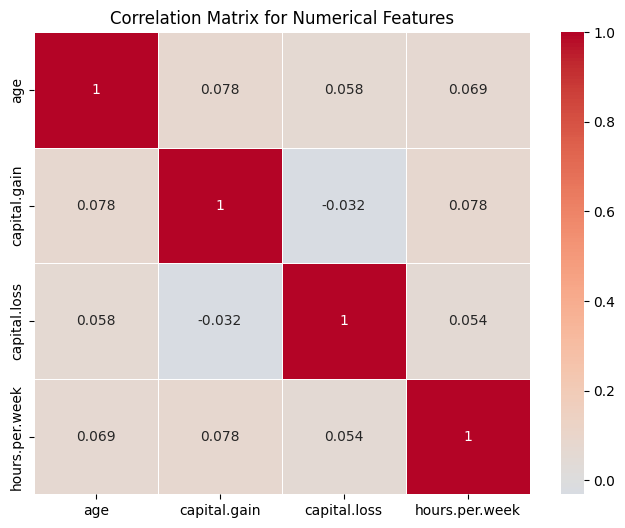

In [453]:
corr_matrix = df[['age', 'capital.gain', 'capital.loss', 'hours.per.week']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

- Capital Gain and Capital Loss have negative correlation since these features reflect different aspects of financial activity.
- Low correlation of hours per week and capital gain indicates that high working hours do not indicate more capital gains.

2. Numerical with target

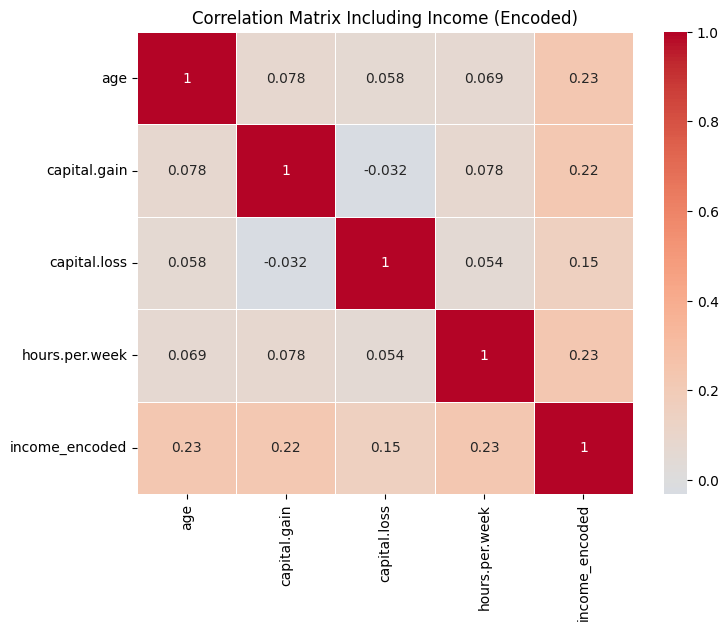

In [454]:
corr_matrix_full = df[['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'income_encoded']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix Including Income (Encoded)')
plt.show()

- Moderate correlation indicates that income is higher for individuals working more hours in a week
- Moderate correlation indicates that income is higher for individuals having high capital gains
- Weak correlation between income and capital loss.
- Moderate correlation indicates higher income for higher age